# Modelos: Support Vector Machines (SVM)

Este notebook nos servirá para introducirnos en el mundo de las Máquinas de Soporte Vectorial (SVM). Código editado a partir del que se utiliza en GÉRON, Aurélien; Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow; EE.UU., O'Reilly Media, 2019 (Chapter 5).

Mentor: Dr. Manuel David Morales (manuel.morales@saturdays.ai)

# **Contenido<br>**

## I. Clasificación SVM lineal
## II. Clasificación SVM no lineal
## III. Regresión SVM lineal y no lineal (para autoestudio)

Primeramente, vamos a importar algunos modulos de uso común, asegurarnos de activar gráficas con MatplotLib "inline", y preparar una función para guardar las figuras. También checamos que la versión de Python instalada sea ≥ 3.5, y que la versión de scikit-learn sea ≥0.20. Python en versiones 2.x podría funcionar, pero dado que ya son versiones obsoletas, no son recomendables.

In [1]:
# Requerimos Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# Requerimos scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Importaciones comunes
import numpy as np
import os

# Salidas aleatorias reproducibles
np.random.seed(42)

# Configuracion visual para las gráficas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Las figuras se guardaran en la carpeta "images" junto al notebook
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# **I. Clasificación SVM lineal**

In [2]:
# Importamos Clasificador de Soporte Vectorial (SVC) de scikit-learn
from sklearn.svm import SVC

# Importamos el dataset IRIS, lo guardamos como diccionario y mostramos sus claves
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# Descripción del dataset (clave 'DESCR')
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# Guardamos: 1) Atributos "largo del petalo" y "ancho del petalo" en el arreglo X
#            2) Clases (1,2,3) en el arreglo objetivo y
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [5]:
# Vamos a trabajar con los ejemplos de flores "setosa" y "versicolor", únicamente
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

## **I.1. Clasificación de Margen Duro (Hard Margin Classification)**

Ahora intentaremos comprender, a partir de dos figuras bien ilustrativas, como funciona una SVM lineal, en nuestro problema de clasificación binaria.

In [6]:
# Recurrimos a un modelo SVM clasificador con un kernel lineal
svm_clf = SVC(kernel="linear", C=float("inf"))

# Entrenamos el modelo
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

Ahora vamos a graficar los datos, incluyendo diferentes fronteras de decisión entre clases

Saving figure large_margin_classification_plot


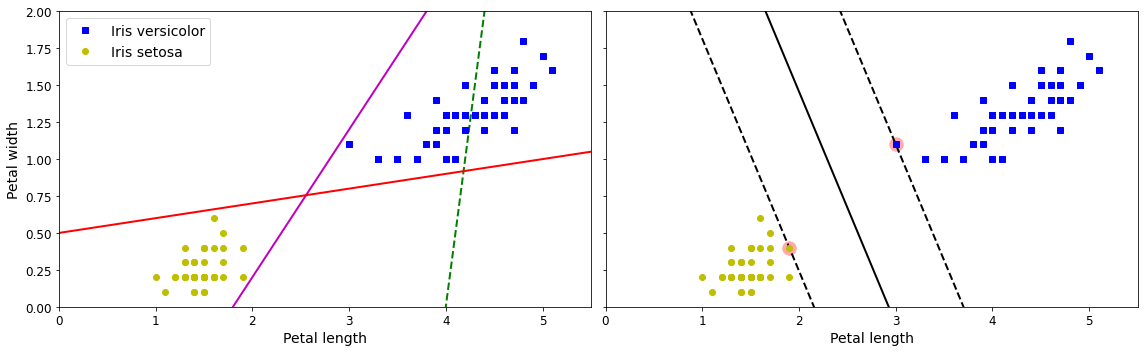

In [7]:
# Definimos, "a mano", tres fronteras de decisión abiertamente malas.
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

# Función para definir y graficar fronteras de decisión entre clases
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Generación de las gráficas
fig, axes = plt.subplots(ncols=2, figsize=(16,5), sharey=True)

# Gráficas de las fronteras de decisión malas
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# Gráfica de un modelo SVM con una frontera de decisión mucho mejor
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

De ambas gráficas notamos los siguienes puntos:

**(1)** Los datos son lineales, ya que ambas clases pueden separarse fácilmente a través de una línea recta.<br>
**(2)** A la izquierda vemos tres fronteras de decisión. Una es abiertamente mala (línea discontinua), y las otras dos son menos malas pero siempre no adecuadas, ya que se localizan muy cerca de las muestras.<br>
**(3)** A la derecha vemos un clasificador SVM mucho mejor que los de la izquierda. Separa claramente a ambas clases de flores y su la frontera de decisión está los suficientemente alejada de los ejemplos de ambas clases.<br>

-- Entonces, el clasificador SVM lineal ajusta el ancho de la "banda" o "camino" entre ambas clases.

-- En este caso, los extremos laterales de esta banda están definidos por los primeros ejemplos, más próximos de ambas clases -se les llama "vectores de soporte". Como esta es la banda <u>más ancha posible</u>, le llamamos **clasificación de margen amplio**

-- Por lo demás, es muy probable que si incluimos nuevos ejemplos el modelo no se vea afectado, ya que al configurar un margen amplio entre los extremos y la frontera de decisión, dichos ejemplos muy probablemente caigan fuera de la banda -si cayeran dentro de la banda, la clasificación sería de margen suave, como veremos más adelante.

## I.2. Sensibilidad a la escala de los atributos

Los modelos SVM son sensibles a la escala de los atributos (features). Esto puede tratarse con el modulo "StandardScaler", el cual estandariza los atributos x tal que los nuevos atributos están dados por **z = (x - u) / s**, con u denotando el promedio y s la desviación estándar.

Saving figure sensitivity_to_feature_scales_plot


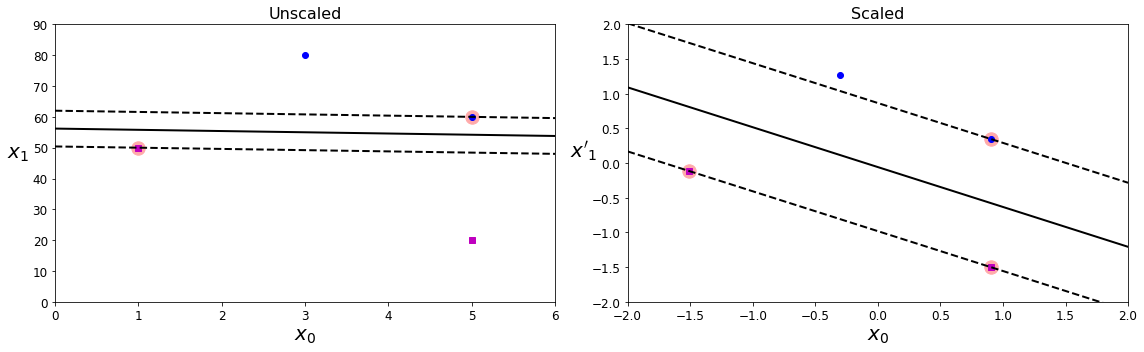

In [8]:
# Ocupamos datos sintéticos
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# Entrenamos un modelo SVM con kernel lineal y C=100
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

# Gráfica del modelo con los atributos originales
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# Reescalamiento de los atributos y nuevo entrenamiento de SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

# Gráfica del modelo con los atributos reescaleados
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")


-- En la gráfica izquierda vemos que la escala vertical es mucho más grande que la escala horizontal, lo que resulta en una frontera de decisión prácticamente horizontal. En la gráfica derecha ya se ha aplicado el módulo "StandardScale", mejorando la situación.

-- Es deseable aplicar reescaleos a los atributos (usualmente normalización), para que las variaciones de los atributos sean del mismo orden.

## I.3. Clasificación de Margen Suave (Soft Margin Classification)

-- La clasificación de margen duro tiene dos dificultades: **(1)** solo funciona con datos lineales, y **(2)** es sensible a los valores atípicos (outliers).

-- Veamos lo que sucede si para el ejemplo con los datos de iris y dos clases, introducimos un valor atípico.

Saving figure sensitivity_to_outliers_plot


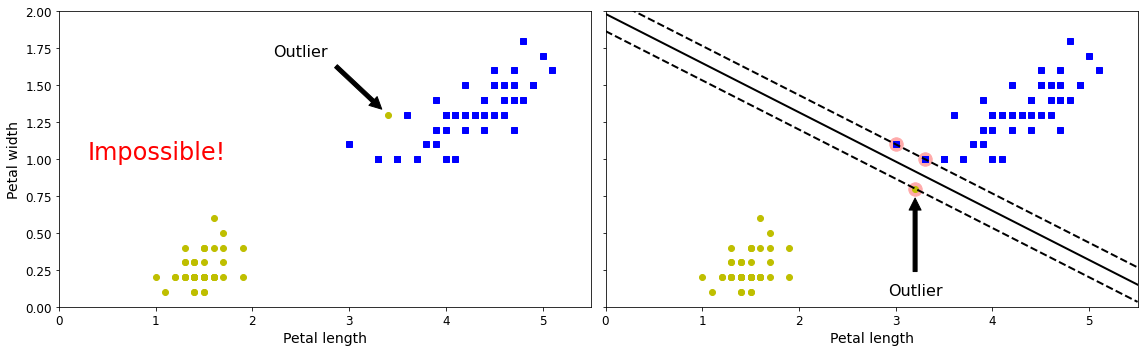

In [9]:
# Introducimos "a mano" valores atípicos (outliers)
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

# Incluimos dichos outliers en el dataset original
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

# Entrenamos modelo SVM con el segundo outlier
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(16,5), sharey=True)

#Grafica con el primer outlier
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

#Grafica con el segundo outlier
plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

-- A la izquierda es imposible encontrar una frontera de decisión con amplio margen. A la derecha, encontramos una frontera, aunque con un pequeño margen entre los vectores de soporte, y estando muy cerca a los ejemplos de la clase versicolor. Esto podría dar problemas para generalizar el modelo.

-- Por esto, es que necesitamos trabajar con un modelo más flexible. Que dicho modelo: i) maneje un margen lo suficientemente amplio (ancho de la banda), pero también, ii) que permita un cierto número de violaciones, i.e. ejemplos que caigan dentro de la banda, o incluso, del lado incorrecto de clase.

-- Para superar el problema de los outliers, recurrimos a una clasificación de margen suave, que es un modelo más flexible.

-- Para balancear el ancho de la banda y el número de violaciones, necesitamos controlar un hiperparámetro denotado por **C>0**. Mientras más cercano a cero, más amplio será el margen de la clasificación, y mientras más grande, menor será el margen.

--- Veremos un ejemplo más abajo...

### ---------> Inicio de Paréntesis: Creación de tubería (pipeline)

Una tubería es una estructura que aplica a los datos, secuencialmente, transformaciones y un estimador final.

In [10]:
# Importamos Pipeline
from sklearn.pipeline import Pipeline

# Importamos modelo SVM lineal
from sklearn.svm import LinearSVC

# La tubería en cuestión, svm_clf: i) estandarizar los atributos (reescaleo), ii) incluir modelo SVM lineal clasificador
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

# Entrenamos el modelo. Recordar que atributos son el largo y ancho del pétalo,
# y que nuestra clasificación es binaria para detectar clase 0 (setosa) o clase 1 (versicolor)

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [11]:
# Predecimos con modelo svm_clf la clase objetivo del dato (5.5, 1.7)
svm_clf.predict([[5.5, 1.7]])

array([1])

### ---------> Fin de Paréntesis

Ahora aplicaremos una clasificación de margen suave, viendo como el hiperparámetro C define el ancho de la banda y el número de violaciones en un modelo SVM.

In [12]:
# Importamos librerías comunes, modelo para tuberías, estandarizador y modelo SVM lineal
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Descargamos nuevamente dataset iris
iris = datasets.load_iris()

# Utilizamos atributos largo y ancho de pétalo
X = iris["data"][:, (2, 3)]  # petal length, petal width

# Ahora vamos a realizar una clasificación binaria para detectar clase 2 virginica (vs. el resto)
y = (iris["target"] == 2).astype(np.float64)

In [13]:
# Definimos estandarización
scaler = StandardScaler()

# Definimos dos modelos SVM lineales.
# ----- Escogemos hiperparámetros C=1 y C=90
# ----- Utilizamos función de pérdida "hinge" (¡investigar!)
# ----- Fijamos semilla para resultados aleatorios reproducibles en 42

svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=90, loss="hinge", random_state=42)

# Creación de las tuberías: estandarizacion y modelo SVM
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

# Entrenamiento de los modelos
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=90, loss='hinge', random_state=42))])

In [14]:
# Parámetros para las fronteras de decisión
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Encontrar vectores soporte (El modelo LinearSVC no hace esto de forma automática)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


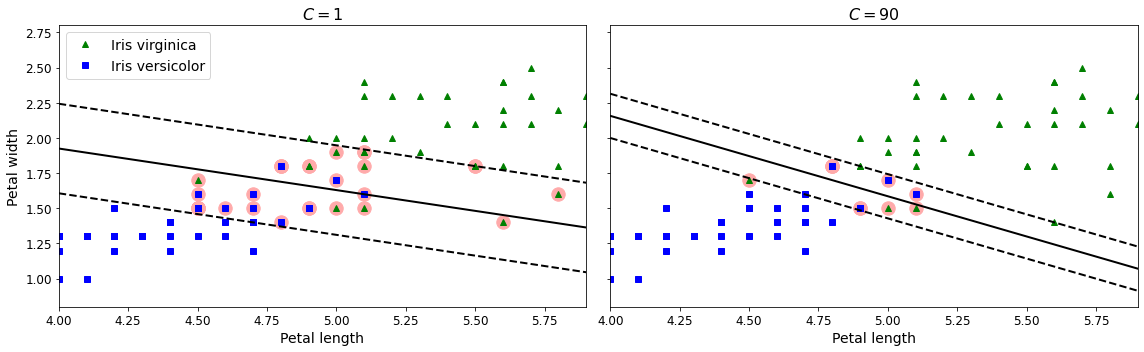

In [15]:
# Creación de gráficas
fig, axes = plt.subplots(ncols=2, figsize=(16,5), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

-- A la derecha: Modelo SVM lineal con margen pequeño y pocas violaciones (C=90, grande)

-- A la izquierda: Modelo SVM lineal con margen amplio (C=1, pequeño).

-- Es muy probable que el clasificador de la derecha generalice mejor, ya que en el entrenamiento comete menos errores de clasificación por su particular frontera de decisión.

# **II. Clasificación SVM no lineal**

¿Y qué sucede cuando los datos **no son linealmente separables**?

Un tratamiento útil es agregar <u>más atributos</u>, como habitualmente lo haríamos en una regresión polinomial.

Saving figure higher_dimensions_plot


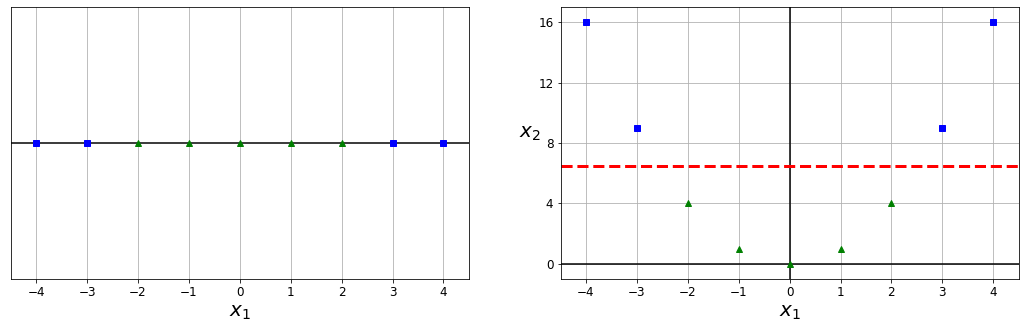

In [16]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

-- De las gráficas anteriores vemos un ejemplo muy sencillo. Tenemos una distribución no lineal con un atributo, x1.

-- Luego, agregando un segundo atributo x2=(x1)^2, vemos que obtenemos un nuevo dataset en 2D, que es separable -de hecho, **linealmente separable**.

## I.1. Kernels Polinomiales 

Vamos a considerar un ejemplo, considerando el modulo make_moons para generar datos sintéticos.<br><br>
Este consiste en 2 atributos y 2 clases objetivo, 0 y 1. Los datos se dispersan como dos semicírculos entrelazados, uno por cada clase.

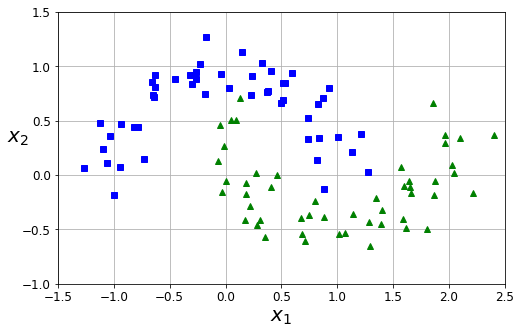

In [17]:
# Importar dataset make_moons
from sklearn.datasets import make_moons

# Definimos atributos y clases objetivo con función make_moons()
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plt.figure(figsize=(8, 5))

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Ahora vamos a crear una tubería con un transformador polinomial de orden 3, para así separar los datos.

In [18]:
# Importamos dataset make_moons
from sklearn.datasets import make_moons

# Importamos Pipeline
from sklearn.pipeline import Pipeline

# Importamos transformador "PolynomialFeatures"
from sklearn.preprocessing import PolynomialFeatures

# Creamos la tubería: i) transformador polinomial de orden 3, ii) estandarizador, iii) SVM lineal
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42, max_iter=2000))
    ])

# Entrenamos el modelo
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=2000,
                           random_state=42))])

Saving figure moons_polynomial_svc_plot


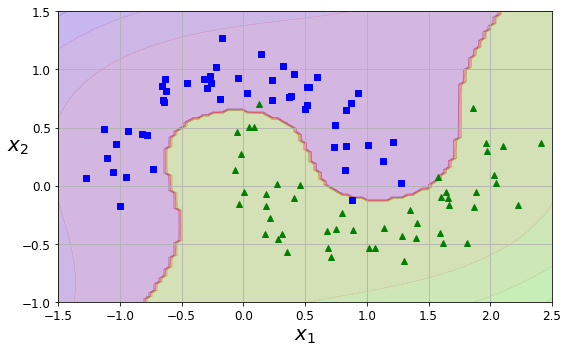

In [19]:
# Graficamos los datos con la frontera de decisión para el modelo

plt.figure(figsize=(8, 5))

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

-- Trabajar con transformador polinomiales es fácil de implementar en muchos algoritmos de Machine Learning<br>

-- Aun así, polinomios de orden bajo no pueden lidiar con datasets complejos (muchos atributos), y polinomios de orden alto son compuacionalmente prohibitivos ya que crean muchos atributos extras, y por ende, vuelven muy lentos los modelos SVM.<br>

-- Afortunadamente, al trabajar con modelos SVM podemos implementar una técnica conocida como el "kernel trick". Es un truco muy conveniente, que emula el efecto que tendría en los datos si se agregáramos atributos polinomiales, pero sin agregarlos.

In [20]:
# Importamos clasificador de soporte vectorial (SVC)
from sklearn.svm import SVC

# Tubería: i) estandarizador, ii) SVC con kernel polinómico de grado 3
# Hiperparámetro coef0 controla la influencia de polinomios de grado alto vs. polinomios de grado bajo (lo habíamos designado por "r")
# En la definición aparecía un "gamma", este es el coeficiente del kernel, por defecto ('scale') gamma= 1 / (n_features * X.var())

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

# Entrenamos el modelo
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [21]:
# Otra tubería: i) estandarizador, ii) SVC con kernel polinómico de grado 10
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=20))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=20, coef0=100, degree=10, kernel='poly'))])

Saving figure moons_kernelized_polynomial_svc_plot


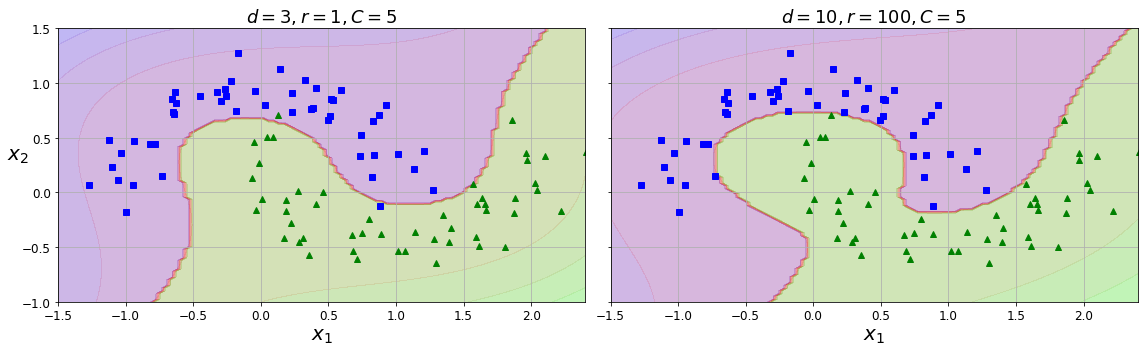

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

Si el modelo presenta overfitting, es recomendable bajar el grado del kernel polinomial.<br>

Y si el modelo presenta underfitting, es conveniente subir el grado del kernel polinomial.<br>

## I.2. Atributos Similares

Otra técnica para tratar datos no lineales, es agregar nuevos atributos calculados mediante una función de semejanza (similarity function). Esta función mide cuanto se asemeja cada ejemplo a una particular referencia (landmark).

Saving figure kernel_method_plot


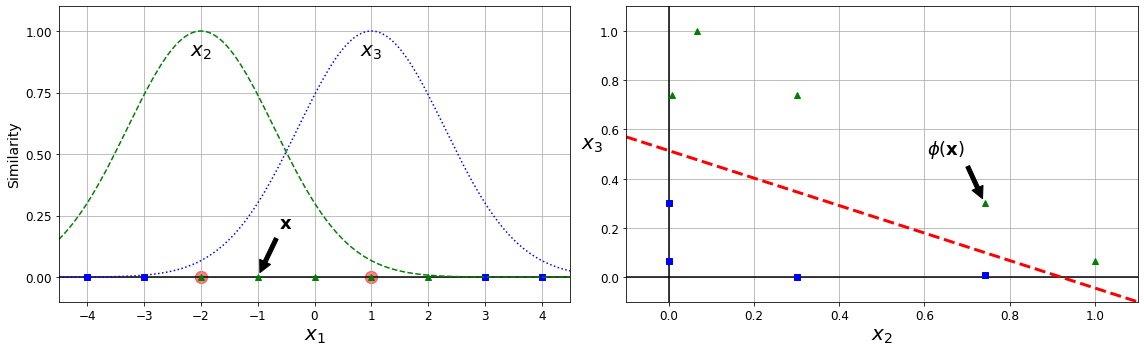

In [23]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

Usamos el dataset no separable que definimos al comienzo de la sección II, y dos referencias: una en $x_1=-2$ y otra en $x_1=+1$ (figura izquierda)<br>

Luego definimos una Función Base Radial Gaussiana: $\phi({\bf x},\ell) = \exp(-\gamma\|{\bf x} - \ell\|^2)$, con $\gamma=0.3$ en cada referencia ($\ell$ denota una referencia o landmark).<br>

Generación de un nuevo atributo situándonos, por ejemplo, en la muestra $x_1=-1$:<br>

$\phi(-1,-2) = x_3 = (-0.3 \times 1^2)^2 \approx 0.74~~~~~~~~$ ,  $~~~~~~~~\phi(-1,+1) = x_3 = (-0.3 \times 2^2)^2 \approx 0.30$ <br>

Y estas nuevas coordenadas se ven reflejada en la figura derecha.<br>
Un check a continuación, utilizando RBF de scikit-learn:

In [24]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


Similar a como ocurría con los atributos polinomiales, aquí es conveniente hacer uso del kernel trick.<br>

Así que nuevamente, construímos una tubería, esta vez con un modelo SVM con kernel de función base radial (gaussiana):

In [25]:
# Definimos tubería y entrenamos el modelo
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Saving figure moons_rbf_svc_plot


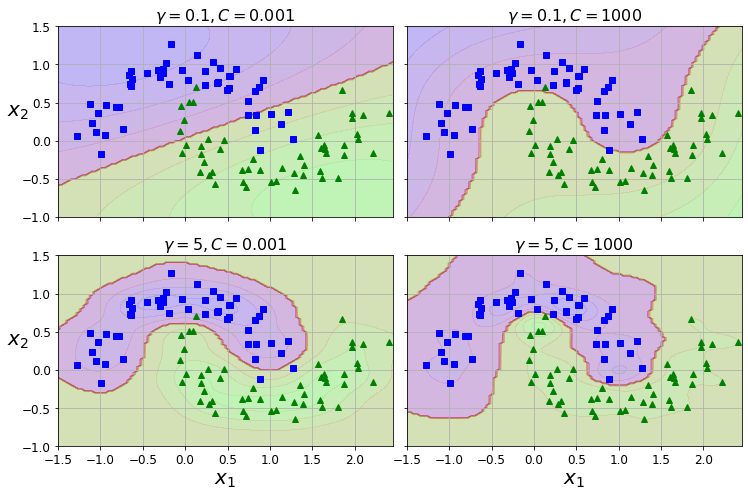

In [26]:
# Ahora simplemente trabajamos con modelos, con diferentes valores para los hiperparámetros gamma y C
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

De aquí vemos que cuando $\gamma$ aumenta, $\phi$ (gaussiana) se vuelve menos dispersa, y por ende, la región de influencia de los ejemplos se vuelve más pequeña. Esto vuelve la frontera de decisión más irregular, rodeando cada uno de los ejemplos.<br>

Cuando $\gamma$ disminuye, $\phi$ (gaussiana) se vuelve más dispersa y la región de influencia de los ejemplos es más grande. Y entonces, la frontera de decisión se suaviza.<br>

Entonces aquí vemos que $\gamma$, al igual que C, actúa como como hiperparámetro de regularización. Si se produce overfitting, convendrá disminuir su valor. Pero se se produce underfitting, entonces deberá incrementarse.

# **III. Regresión SVM lineal y no lineal (para autoestudio)**

Para utilizar regresores SVM, el funcionamiento es a la inversa que la clasificación.<br>

__Clasificación SVM__: Se ajusta el camino más ancho posible entre ejemplos de diferentes clases, limitando el número de violaciones que caen dentro.<br>

__Regresión SVM__: Se ajusta tantos ejemplos como sea posible dentro del camino, mientras se limita el número de violaciones que caen fuera.

In [27]:
# Generamos datos sintéticos
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [28]:
# Importamos y entrenamos un regresor SVM
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [29]:
# Consideramos dos regresores SVM con dif. hiperparámetros epsilon (que define el ancho del camino)

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42) # epsilon=1.5: margen amplio
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42) # epsilon=0.5: margen estrecho
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Saving figure svm_regression_plot


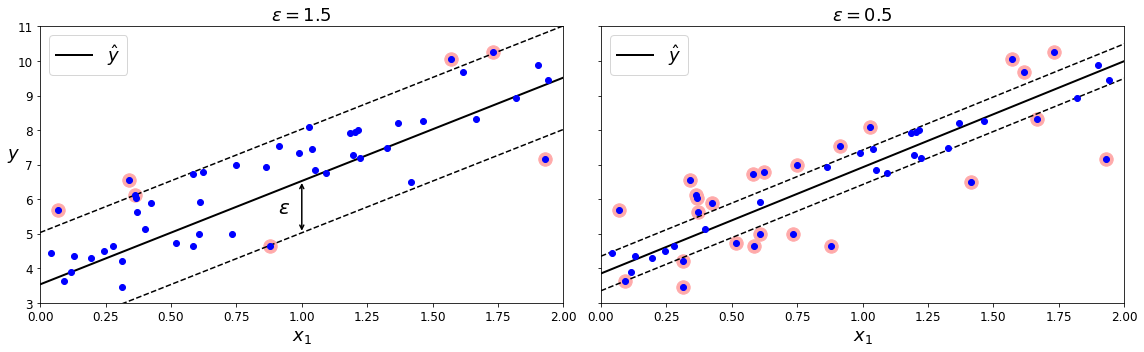

In [30]:
#Graficamos resultados

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

Los regresores SVM son insensibles a $\epsilon$, ya que podemos agregar cuantos ejemplos queramos al interior del camino, sin afectar el modelo.

Ahora veremos como aplicar una regresión no lineal, usando un modelo SVM con kernel.

In [31]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

**Nota**: Usaremos `gamma="scale"`, lo que define el hiperparámetro $\gamma = 1 / (N_{\text{feature}} X) $

In [32]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [33]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

Saving figure svm_with_polynomial_kernel_plot


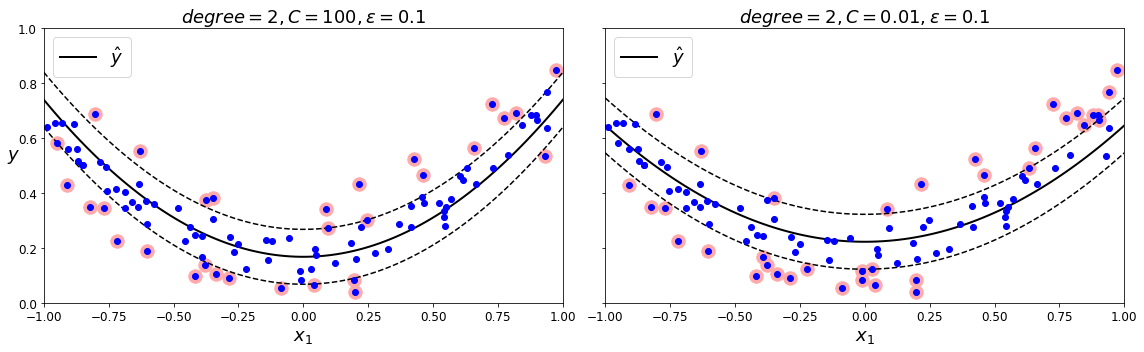

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()